<a href="https://colab.research.google.com/github/Stalinosmj/BeetZart/blob/main/trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries😊😊

In [2]:
import pretty_midi
import librosa
import matplotlib.pyplot as plt
import numpy as np


# Converting MIDI to Spectrogram 🎶📈

In [3]:
def midi_to_spectrogram(midi_path, sr=22050):
  """
  Creates spectrograms (STFT and CQT) from a MIDI file.

  Args:
      midi_path: Path to the MIDI file.
      sr: Sample rate (default: 22050 Hz).

  Returns:
      A tuple containing:
          - spectrogram_stft (STFT spectrogram)
          - spectrogram_cqt (CQT spectrogram)
          - frequencies_stft (STFT frequencies)
          - frequencies_cqt (CQT frequencies)
  """
  try:
    # Convert MIDI to audio using pretty_midi
    pm = pretty_midi.PrettyMIDI(midi_path)
    audio_data = pm.synthesize()

    # Short-Time Fourier Transform (STFT)
    window_size = 1024
    hop_length = 512
    S = librosa.stft(audio_data, n_fft=window_size, hop_length=hop_length)
    spectrogram_stft = np.abs(S)
    frequencies_stft = librosa.core.fft_frequencies(sr=sr, n_fft=window_size)

    # Constant-Q Transform (CQT)
    n_bins = 84
    bins_per_octave = 12
    C = librosa.cqt(audio_data, sr=sr, hop_length=hop_length, n_bins=n_bins, bins_per_octave=bins_per_octave)
    spectrogram_cqt = np.abs(C)
    frequencies_cqt = librosa.cqt_frequencies(n_bins, fmin=librosa.core.midi_to_hz(24), bins_per_octave=bins_per_octave)

    return spectrogram_stft, spectrogram_cqt, frequencies_stft, frequencies_cqt, audio_data, hop_length,sr

  except Exception as e:
    print(f"Error converting MIDI to spectrogram: {e}")
    return None, None, None, None


In [4]:
midi_path = "/content/maestro-v3.0.0_2011_MIDI-Unprocessed_02_R1_2011_MID--AUDIO_R1-D1_08_Track08_wav.midi"  # Replace with your actual path
spectrogram_stft, spectrogram_cqt, frequencies_stft, frequencies_cqt , audio_data, hop_length,sr= midi_to_spectrogram(midi_path)


# Spectrogram Visualization

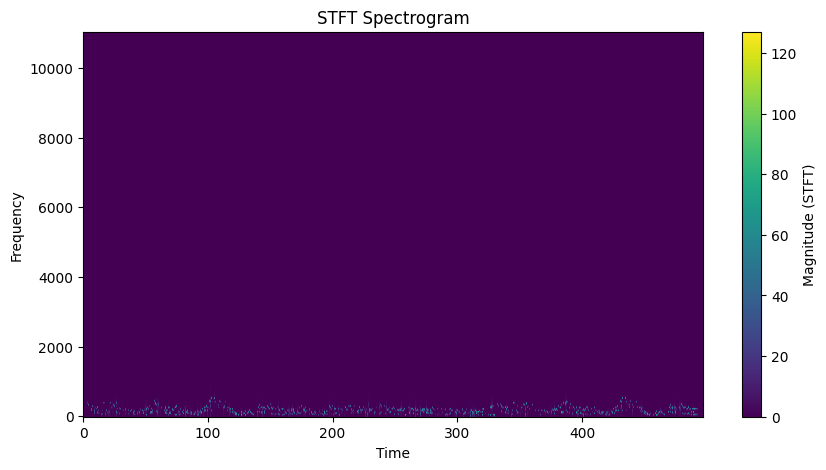

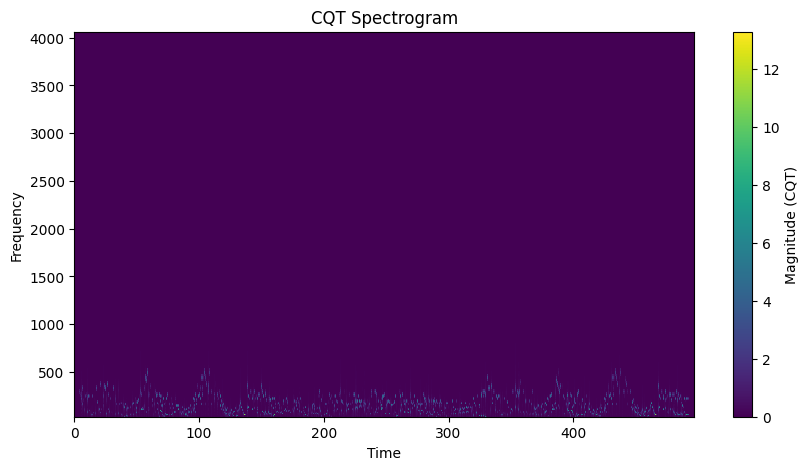

In [5]:

if spectrogram_stft is not None and spectrogram_cqt is not None:
  # Define time and frequency axes for STFT spectrogram
  t = np.arange(0, len(audio_data), hop_length) * (1.0 / sr)

  # Plot STFT spectrogram
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(t, frequencies_stft, spectrogram_stft, shading="auto")
  plt.colorbar(label="Magnitude (STFT)")
  plt.ylabel("Frequency")
  plt.xlabel("Time")
  plt.title("STFT Spectrogram")
  plt.show()

  # Plot CQT spectrogram
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(t, frequencies_cqt, spectrogram_cqt, shading="auto")
  plt.colorbar(label="Magnitude (CQT)")
  plt.ylabel("Frequency")
  plt.xlabel("Time")
  plt.title("CQT Spectrogram")
  plt.show()

# Spliting spectogram and MIDI